# Exercice sur le Théorème de Shanonn

On souhaite réaliser l’échantillonnage d’un signal $s(t)$. Les paramètres de l’échantillonnage sont : $N$ nombre de points et $f_e$ fréquence d’échantillonnage.


1. Pour $N = 1000$ et $f_e = 20$ kHz
    - Que valent la période d’échantillonnage et l’intervalle minimum entre deux raies  ?
        - $T_e$ = 1/$f_e$ = 50 µs et $\Delta$f = 1/$T_a$ = 1/(N$T_e$) = $f_e$/N = 20 Hz
    - Comment s’applique le théorème de Shannon dans ces conditions ?
        - $f_{max}$ < $f_e$/2 soit $f_{max}$ < 10 kHz 
    - Comment diminuer l’intervalle minimum entre deux raies ?
        - augmenter N
    - Comment échantillonner un signal de fréquence plus élevée ?
        - augmenter f_e
    

2. Le nombre de points d’échantillonnage est imposé pour un oscilloscope. Proposer une valeur de durée d'acquisition $t_{\mathrm{obs}}$ pour visualiser deux signaux sinusoïdaux de fréquences 4000 et 4020 Hz avec $N = 4096$.

    - $\Delta f$ < 20 Hz donc 1/$t_{\mathrm{obs}}$ < 20 Hz donc $t_{\mathrm{obs}}$ > 50 ms
    - $f_{max}$ = 4020 Hz donc 8040 Hz < $f_e$ donc 8040 Hz < N/$t_{\mathrm{obs}}$ donc $t_{\mathrm{obs}}$ < 0.5 s
    - on peut donc choisir n'importe quelle valeur dans 0.05 s < $t_{\mathrm{obs}}$ < 0.5 s


3. On souhaite visualiser le spectre de Fourier d’un signal créneau d’amplitude 5,0 V et de fréquence 100 Hz. Le programme suivant en Python permet de visualiser un signal et le spectre de Fourier. Cet algorithme sera utilisé dans l’exercice suivant. Proposer une valeur de $N$ et de la fréquence d’échantillonnage.

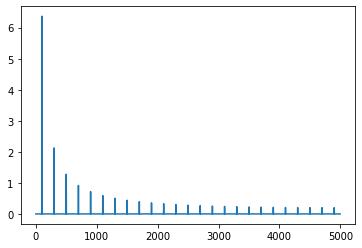

In [2]:
import numpy as np
import matplotlib.pyplot as plt
N = 4000
F = 100
Fe = 10000
Te, deltaF = 1/Fe, Fe/N
T = 1/F
vT, vF = np.arange(N)*Te, np.arange(N)*deltaF
S = np.zeros(N)
Nb_pts_signal = round(T/Te)
for i in range(N) :
    j = i % Nb_pts_signal #j=modulo(i,Nb_pts_signal)
    if j < (Nb_pts_signal/2) :
        S[i] = 5
    else :
        S[i] = -5
TF_Se = np.fft.fft(S)
plt.plot(vF[ :N//2], 1/N*2*abs(TF_Se[ :N//2]))

# Exercice sur le filtrage numérique


On souhaite réaliser un filtrage numérique avec un passe-bas du premier ordre. La période
d’échantillonnage est notée $T_e$. Le signal numérisé est stocké dans une liste de taille $N$, notée $V_E$,
contenant l’ensemble des valeurs $V_E\left(nT_e\right)$ accessible par la commande $Ve[n]$ avec $n \in [0,N − 1]$
en Python.


1. Déterminer l’équation différentielle reliant l’entrée $V_E$ et la sortie $V_S$ aux bornes du condensateur pour un circuit RC série. Définir $\omega_c$, la pulsation de coupure à -3 dB.
    - $RC\dfrac{dV_S}{dt}+V_S = V_E$
    - $\omega_c$ = 1/RC

2. On veut construire la suite $V_S[k] = V_S(kT_e)$ pour $k$ variant de 0 à $N−1$.
    - Intégrer l’équation différentielle entre les points de mesures $kT_e$ et $(k+1)T_e$. On utilise la méthode des trapèzes qui donne 
    \begin{equation*}
    \int_{kT_e}^{(k+1)T_e} V_S(t)dt \simeq \dfrac{V_S((k+1)T_e) + V_S(kT_e) }{2}T_e
    \end{equation*}
        - $\dfrac{1}{\omega_c}(V_S((k+1)T_e) - V_S(kT_e)) + \dfrac{V_S((k+1)T_e) + V_S(kT_e) }{2}T_e = \dfrac{V_E((k+1)T_e) + V_E(kT_e) }{2}T_e$
    - Montrer que la relation de récurrence peut se mettre sous la forme :
    \begin{equation*}
    VS[k + 1] = AVS[k] + B(VE[k + 1] + VE[k])
    \end{equation*}
        - $(V_S((k+1)T_e) - V_S(kT_e)) + \dfrac{V_S((k+1)T_e) + V_S(kT_e) }{2}\omega_cT_e = \dfrac{V_E((k+1)T_e) + V_E(kT_e) }{2}\omega_cT_e$
        - $(1+\dfrac{\omega_cT_e}{2})V_S((k+1)T_e) =  (1- \dfrac{\omega_cT_e}{2})V_S(kT_e) + \dfrac{\omega_cT_e}{2}(V_E((k+1)T_e) + V_E(kT_e))$
    - Exprimer $A$ et $B$ en fonction de $T_e$, et $\omega_c$.
        - $A = \dfrac{2-\omega_cT_e}{2+\omega_cT_e}$ et $B = \dfrac{\omega_cT_e}{2+\omega_cT_e}$

3. On part de VS[0] = 0.
    - En s’aidant de l’énoncé de l’exercice précédent, réaliser un programme Python permettant de créer un signal d’entrée constitué de 1024 points avec une fréquence d’échantillonnage de 1200 Hz, et visualiser le signal ainsi que son spectre.
    - Ecrire un programme mettant en oeuvre la relation de récurence de la question précédente afin de calculer le signal de sortie après passage dans le filtre
    - Visualiser le signal de sortie ainsi que son spectre.

Text(0, 0.5, '$A(v_{e})$')

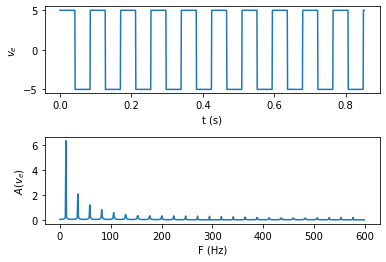

In [8]:
N = 1024
Fe = 1200
F = 1200/1024*10
Te, deltaF = 1/Fe, Fe/N
T = 1/F
vT, vF = np.arange(N)*Te, np.arange(N)*deltaF
Se = np.zeros(N)
Nb_pts_signal = round(T/Te)
for i in range(N) :
    j = i % Nb_pts_signal #j=modulo(i,Nb_pts_signal)
    if j < (Nb_pts_signal/2) :
        Se[i] = 5
    else :
        Se[i] = -5
TF_Se = np.fft.fft(Se)

plt.subplots_adjust(hspace=.5)
plt.subplots_adjust(wspace=.5)
plt.subplot(211)
plt.plot(vT[:],Se[:])
plt.xlabel('t (s)')
plt.ylabel('$v_{e}$')
plt.subplot(212)
plt.plot(vF[ :N//2], 1/N*2*abs(TF_Se[ :N//2]))
plt.xlabel('F (Hz)')
plt.ylabel('$A(v_{e})$')

In [9]:
fc = 20
omegac = 2*np.pi*fc
A = (2.0-omegac*Te)/(2.0+omegac*Te)
B = omegac*Te/(2.0+omegac*Te)

Ss = np.zeros(N)
for i in range(N-1) :
    Ss[i+1] = A*Ss[i]+B*(Se[i+1]+Se[i])

Text(0, 0.5, '$A(v_{s})$')

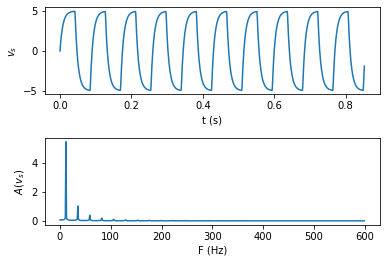

In [10]:
TF_Ss = np.fft.fft(Ss)

plt.subplots_adjust(hspace=.5)
plt.subplots_adjust(wspace=.5)
plt.subplot(211)
plt.plot(vT[:],Ss[:])
plt.xlabel('t (s)')
plt.ylabel('$v_{s}$')
plt.subplot(212)
plt.plot(vF[ :N//2], 1/N*2*abs(TF_Ss[ :N//2]))
plt.xlabel('F (Hz)')
plt.ylabel('$A(v_{s})$')

# Pour expérimenter sur un son audio

Voici une liste de librairies qui seront utile pour manipuler un fichier son avec Python.

In [ ]:
import wave
import math
import binascii
import winsound
import struct
import os
import scipy.io.wavfile
import scipy

Choisissez ensuite un signal d'entrée constitué de deux harmoniques de fréquence $f_a$ et $f_b$ et via par exemple les paramètres suivants

In [ ]:
Ta = 2 #durée d'acquisition en seconde du signal
Fe = 44100 #fréquence d'échantillonnage en Hz pour signaux audio
f_a = 220 # fréquence en Hz de l'harmonique a présente dans le signal
f_b = 220*(2**4) # fréquence en Hz de l'harmonique b présente dans le signal
niveau = 1 # niveau sonore des hauts-parleur
nbCanal = 2    # stéreo
nbOctet = 1    # taille d'un échantillon : 1 octet = 8 bits

Après avoir calculé et affiché le signal d'entré $V_e$, vous pourrez écrire dans un fichier audio .wav votre signal audio à l'aide des lignes de commande suivantes

In [ ]:
NomFichier = 'son.wav'
Monson = wave.open(NomFichier,'w')
parametres = (nbCanal,nbOctet,Fe,N,'NONE','not compressed')# tuple
Monson.setparams(parametres)    # création de l'en-tête (44 octets)
for i in range(0,N):
    # canal gauche
    # 127.5 + 0.5 pour arrondir à l'entier le plus proche
    valG = wave.struct.pack('B',int(128.0 + 127.5*0.5*ve[i]))
    # canal droit
    valD = wave.struct.pack('B',int(128.0 + 127.5*0.5*ve[i]))
    Monson.writeframes(valG + valD) # écriture frame

Monson.close()

Pour écouter ce même fichier audio .wav à l'aide de la librairie winsound vous pouvez utiliser les lignes de commandes suivantes

In [ ]:
Fichier = open(NomFichier,'rb')
data = Fichier.read()
tailleFichier = len(data)
print('\nTaille du fichier',NomFichier, ':', tailleFichier,'octets')
print("Lecture du contenu de l'en-tête (44 octets) :")
print(binascii.hexlify(data[0:44]))
print("Nombre d'octets de données :",tailleFichier - 44)
Fichier.close()
winsound.PlaySound('son.wav',winsound.SND_FILENAME)

Vous pouvez ensuite mettre en oeuvre le filtrage numérique de ce signal d'entrée et écouter le signal de sortie en écrivant votre signal de sortie dans un nouveau fichier .wav et en le lisant à l'aide de winsound.